In [202]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt#visualization

# Data selection

- DAY_OF_MONTH
- DAY_OF_WEEK
- ORIGIN:Origin Airport
- DEST:destination Airport
- DEP_DELAY_GROUP:Departure Delay intervals, every (15 minutes from <-15 to >180)
- ARR_DELAY_GROUP:Arrival Delay intervals, every (15-minutes from <-15 to >180)
- AIR_TIME:Actual Arrival Time (local time: hhmm)	
- FLIGHTS:Number of Flights
- DISTANCE_GROUP:Distance Intervals, every 250 Miles, for Flight Segment


I select these feature because it's most information passenger knowing about the flight others more technical features

In [54]:
data=pd.read_csv('E:\\Nu\\practical machine learning\\Assignments\\ass5\\d2\\ONTIME_MARKETING.csv')

In [55]:
data

,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN,DEST,DEP_DELAY_GROUP,ARR_DELAY_GROUP,AIR_TIME,FLIGHTS,DISTANCE_GROUP,Unnamed: 9
0,1,1,CHS,ATL,-1.0,-1.0,50.0,1.0,2,NaN
1,1,1,DTW,GSO,2.0,-1.0,68.0,1.0,2,NaN
2,1,1,LGA,SYR,-1.0,-2.0,42.0,1.0,1,NaN
3,1,1,MSN,LGA,6.0,5.0,100.0,1.0,4,NaN
4,1,1,DTW,AUS,-1.0,-2.0,169.0,1.0,5,NaN
...,...,...,...,...,...,...,...,...,...,...
621456,31,3,CAE,IAD,-1.0,-2.0,64.0,1.0,2,NaN
621457,31,3,ATW,ORD,-1.0,-2.0,40.0,1.0,1,NaN
621458,31,3,ORD,TYS,-1.0,-2.0,71.0,1.0,2,NaN
621459,31,3,ATW,ORD,-1.0,-1.0,38.0,1.0,1,NaN


In [56]:
data.drop(['Unnamed: 9'],axis=1,inplace=True)

In [57]:
data

,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN,DEST,DEP_DELAY_GROUP,ARR_DELAY_GROUP,AIR_TIME,FLIGHTS,DISTANCE_GROUP
0,1,1,CHS,ATL,-1.0,-1.0,50.0,1.0,2
1,1,1,DTW,GSO,2.0,-1.0,68.0,1.0,2
2,1,1,LGA,SYR,-1.0,-2.0,42.0,1.0,1
3,1,1,MSN,LGA,6.0,5.0,100.0,1.0,4
4,1,1,DTW,AUS,-1.0,-2.0,169.0,1.0,5
...,...,...,...,...,...,...,...,...,...
621456,31,3,CAE,IAD,-1.0,-2.0,64.0,1.0,2
621457,31,3,ATW,ORD,-1.0,-2.0,40.0,1.0,1
621458,31,3,ORD,TYS,-1.0,-2.0,71.0,1.0,2
621459,31,3,ATW,ORD,-1.0,-1.0,38.0,1.0,1


In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 621461 entries, 0 to 621460
Data columns (total 9 columns):
DAY_OF_MONTH       621461 non-null int64
DAY_OF_WEEK        621461 non-null int64
ORIGIN             621461 non-null object
DEST               621461 non-null object
DEP_DELAY_GROUP    602399 non-null float64
ARR_DELAY_GROUP    600857 non-null float64
AIR_TIME           600198 non-null float64
FLIGHTS            621461 non-null float64
DISTANCE_GROUP     621461 non-null int64
dtypes: float64(4), int64(3), object(2)
memory usage: 42.7+ MB


In [59]:
data.isnull().sum()

DAY_OF_MONTH           0
DAY_OF_WEEK            0
ORIGIN                 0
DEST                   0
DEP_DELAY_GROUP    19062
ARR_DELAY_GROUP    20604
AIR_TIME           21263
FLIGHTS                0
DISTANCE_GROUP         0
dtype: int64

In [67]:
#Fill nulls in arrival delay group by most frequent value 
data['ARR_DELAY_GROUP'].value_counts()

-1.0     225549
-2.0     168740
 0.0      98770
 1.0      38956
 2.0      20099
 3.0      12381
 4.0       8333
 12.0      6787
 5.0       5819
 6.0       4231
 7.0       3325
 8.0       2718
 9.0       2105
 10.0      1652
 11.0      1392
Name: ARR_DELAY_GROUP, dtype: int64

In [68]:
data['ARR_DELAY_GROUP'].fillna(-1.0,inplace=True)

In [62]:
data['DEP_DELAY_GROUP'].value_counts()

-1.0     370744
 0.0     117100
 1.0      37858
 2.0      20339
 3.0      12764
 4.0       8525
 12.0      6941
 5.0       6116
-2.0       5898
 6.0       4528
 7.0       3551
 8.0       2698
 9.0       2161
 10.0      1758
 11.0      1418
Name: DEP_DELAY_GROUP, dtype: int64

In [63]:
data['DEP_DELAY_GROUP'].fillna(-1.0,inplace=True)

In [64]:
#fill nulls in arrival time by mean
data['AIR_TIME'].fillna(data.AIR_TIME.mean(),inplace=True)

In [69]:
data.isna().sum()

DAY_OF_MONTH       0
DAY_OF_WEEK        0
ORIGIN             0
DEST               0
DEP_DELAY_GROUP    0
ARR_DELAY_GROUP    0
AIR_TIME           0
FLIGHTS            0
DISTANCE_GROUP     0
dtype: int64

In [70]:
#label encode
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
data['ORIGIN']=labelencoder.fit_transform(data['ORIGIN'])
data['DEST']=labelencoder.fit_transform(data['DEST'])

data.head()

,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN,DEST,DEP_DELAY_GROUP,ARR_DELAY_GROUP,AIR_TIME,FLIGHTS,DISTANCE_GROUP
0,1,1,63,20,-1.0,-1.0,50.0,1.0,2
1,1,1,94,135,2.0,-1.0,68.0,1.0,2
2,1,1,191,328,-1.0,-2.0,42.0,1.0,1
3,1,1,226,191,6.0,5.0,100.0,1.0,4
4,1,1,94,22,-1.0,-2.0,169.0,1.0,5


In [71]:
y=data.ARR_DELAY_GROUP
y

0        -1.0
1        -1.0
2        -2.0
3         5.0
4        -2.0
         ... 
621456   -2.0
621457   -2.0
621458   -2.0
621459   -1.0
621460   -2.0
Name: ARR_DELAY_GROUP, Length: 621461, dtype: float64

In [106]:
X=data.drop('ARR_DELAY_GROUP',axis=1)

In [107]:
# i droped flights because i find it has feature importance = 0 
X.drop('FLIGHTS',axis=1,inplace=True)

In [132]:
# Import necessary modules

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

param_dist = {"max_depth": [17,18,19],\
              "criterion": ["gini", "entropy"],
              #"max_features": [2,3,4,5],
              #'min_samples_leaf': [0.04, 0.06],
               #'splitter':['best', 'random'],
             #'random_state':[1,2,3,4]
             }

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

# Instantiate a Decision Tree classifier: tree
tree = DecisionTreeClassifier();

#scoring metric
scoring = ['accuracy','f1_macro','precision_macro', 'recall_macro']
# Instantiate the GridSearchCV object: logreg_cv
dt_cv = GridSearchCV(tree, param_dist,refit='accuracy',scoring=scoring,cv=20)

# Fit it to the training data
dt_cv.fit(X_train, y_train)

# Print the optimal parameters and best score
#print("Tuned dt  Parameter: {}".format(dt_cv.best_params_))
print("Tuned dt  Accuracy: {}".format(dt_cv.best_score_))
print('best estimator:{}'.format(dt_cv.best_estimator_))

Tuned dt  Accuracy: 0.5170336212881188
best estimator:DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=17,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')


In [145]:
pd.Series(dt_cv.best_estimator_.feature_importances_)

0    0.075208
1    0.039640
2    0.129480
3    0.111613
4    0.412126
5    0.195014
6    0.036919
dtype: float64

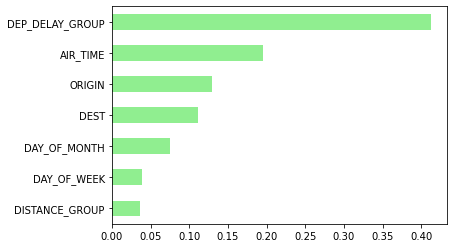

In [144]:
# Create a pd.Series of features importances
importances_dt = pd.Series(dt_cv.best_estimator_.feature_importances_, index = X.columns)
# Sort importances_dt
sorted_importances_dt = importances_dt.sort_values()
# Make a horizontal bar plot
sorted_importances_dt.plot(kind='barh', color='lightgreen'); plt.show()

In [146]:
dt_cv.best_estimator_.feature_importances_

array([0.07520773, 0.03963991, 0.12947996, 0.11161298, 0.41212645,
       0.19501364, 0.03691933])

In [135]:
dt_cv.cv_results_['mean_test_f1_macro']

array([0.37365388, 0.37026568, 0.36654347, 0.35591342, 0.35278368,
       0.34843336])

In [133]:
#instantiate best model 
best_model=dt_cv.best_estimator_


In [147]:
#test accuracy
best_model.score(X_test,y_test)

0.5175472942892849

In [138]:
#using test data to predict and get confusion matrix.
y_predicted=best_model.predict(X_test)
y_predicted

array([ 0.,  4., -2., ...,  7., -2., -2.])

In [139]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

        -2.0       0.57      0.52      0.54     50835
        -1.0       0.55      0.71      0.62     73599
         0.0       0.42      0.26      0.32     29633
         1.0       0.37      0.27      0.31     11720
         2.0       0.35      0.28      0.31      6039
         3.0       0.33      0.29      0.31      3707
         4.0       0.33      0.27      0.30      2483
         5.0       0.35      0.31      0.33      1757
         6.0       0.32      0.28      0.30      1235
         7.0       0.31      0.31      0.31       992
         8.0       0.34      0.29      0.31       859
         9.0       0.32      0.32      0.32       627
        10.0       0.23      0.19      0.21       489
        11.0       0.24      0.19      0.21       423
        12.0       0.87      0.84      0.86      2041

    accuracy                           0.52    186439
   macro avg       0.39      0.35      0.37    186439
weighted avg       0.50   

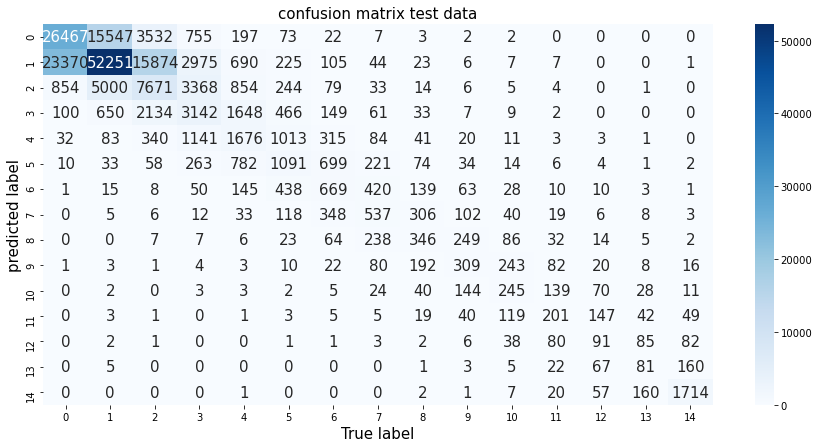

In [140]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(15,7))
cm=confusion_matrix(y_predicted, y_test)
plt.title("confusion matrix test data",fontsize=15)
sns.heatmap(cm, annot=True, fmt='d',annot_kws={'size':15},square=False,cmap='Blues',cbar=True)
plt.xlabel('True label',fontsize=15)
plt.ylabel('predicted label',fontsize=15)
plt.show()

# Random forest

Base estimator: Decision Tree, Logistic Regression, Neural Net, ...

Each estimator is trained on a distinct bootstrap sample of the training set

Estimators use all features for training and prediction

# Bagging

Ensemble methods are fit to the same trainning set using different algorithms and the final predictions are obtained by majority voting

In bagging, the ensemble is formed by models that use the same trainning algorithm, However these models are not trained on entire trainnind dataset.Instead each model is trained on subset of the data.

Bagging: Bootstrap aggregation, use technique known as bootstrap

In [157]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier


In [152]:
#Instantiate a Decision Tree classifier
rf=RandomForestClassifier(n_estimators=20,)

In [158]:
# Instantiate the Bagging object with decision tree classifer.
bg_rf = BaggingClassifier(base_estimator=rf,n_estimators=20)



BaggingClassifier(base_estimator=RandomForestClassifier(bootstrap=True,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features='auto',
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        n_estimators=20,
                                                        n_jobs=None,
        

In [160]:
# Fit it to the training data
bg_rf.fit(X_train, y_train)

BaggingClassifier(base_estimator=RandomForestClassifier(bootstrap=True,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features='auto',
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        n_estimators=20,
                                                        n_jobs=None,
        

In [161]:
#predict class of x test 
y_predicted2=bg_rf.predict(X_test)

In [162]:
#Return the mean accuracy on the given test data and labels
bg_rf.score(X_test,y_test)

0.529261581536052

In [167]:
print(classification_report(y_test,y_predicted2))

              precision    recall  f1-score   support

        -2.0       0.59      0.59      0.59     50835
        -1.0       0.57      0.66      0.61     73599
         0.0       0.40      0.30      0.34     29633
         1.0       0.38      0.29      0.33     11720
         2.0       0.37      0.29      0.32      6039
         3.0       0.35      0.31      0.33      3707
         4.0       0.34      0.29      0.31      2483
         5.0       0.35      0.28      0.31      1757
         6.0       0.33      0.30      0.31      1235
         7.0       0.32      0.30      0.31       992
         8.0       0.34      0.29      0.31       859
         9.0       0.32      0.29      0.30       627
        10.0       0.33      0.25      0.29       489
        11.0       0.30      0.09      0.14       423
        12.0       0.86      0.93      0.89      2041

    accuracy                           0.53    186439
   macro avg       0.41      0.36      0.38    186439
weighted avg       0.52   

In [166]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_predicted2))

0.529261581536052


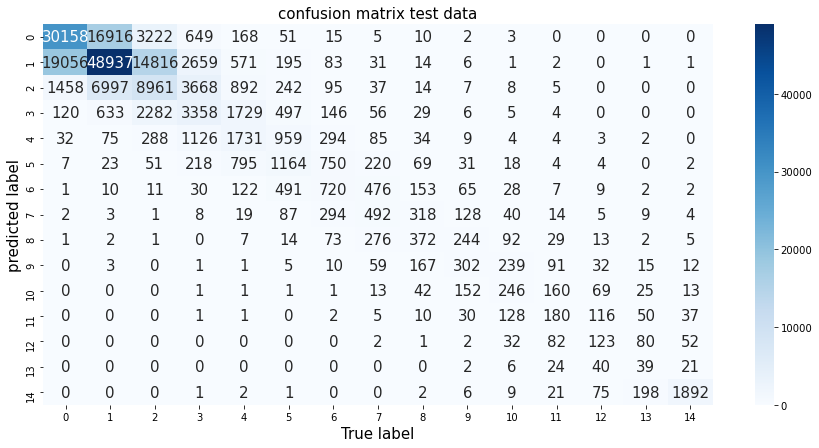

In [165]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(15,7))
cm=confusion_matrix(y_predicted2, y_test)
plt.title("confusion matrix test data",fontsize=15)
sns.heatmap(cm, annot=True, fmt='d',annot_kws={'size':15},square=False,cmap='Blues',cbar=True)
plt.xlabel('True label',fontsize=15)
plt.ylabel('predicted label',fontsize=15)
plt.show()

# Comparison between Two models 

- Bagging random forest has macro avg and weighted avg more little more than decision tree best model in overall macro avg and weghtied avg

- From confusion matrix bagging random forest also doing better than decision tree best model.


# Validate on the data of January Year 2019 

In [168]:
data2019=pd.read_csv('E:\\Nu\practical machine learning\\Assignments\\ass5\data2019\\614034541_T_ONTIME_MARKETING.csv')

In [169]:
data2019

,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN,DEST,DEP_DELAY_GROUP,ARR_TIME,ARR_DELAY_GROUP,DISTANCE_GROUP,Unnamed: 8
0,1,2,MYR,CLT,0.0,2308.0,-1.0,1,NaN
1,1,2,BDL,DCA,1.0,1331.0,0.0,2,NaN
2,1,2,DCA,BDL,0.0,1140.0,0.0,2,NaN
3,1,2,DCA,GSP,-1.0,2122.0,-1.0,2,NaN
4,1,2,ORF,CLT,-1.0,1333.0,-1.0,2,NaN
...,...,...,...,...,...,...,...,...,...
638644,31,4,PNS,ORD,NaN,NaN,NaN,4,NaN
638645,31,4,IAD,ROC,-1.0,1400.0,-1.0,2,NaN
638646,31,4,TYS,IAD,-1.0,1128.0,-1.0,2,NaN
638647,31,4,CLE,LGA,-1.0,1812.0,0.0,2,NaN


In [170]:
data2019.drop('Unnamed: 8',axis=1,inplace=True)

In [171]:
data2019

,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN,DEST,DEP_DELAY_GROUP,ARR_TIME,ARR_DELAY_GROUP,DISTANCE_GROUP
0,1,2,MYR,CLT,0.0,2308.0,-1.0,1
1,1,2,BDL,DCA,1.0,1331.0,0.0,2
2,1,2,DCA,BDL,0.0,1140.0,0.0,2
3,1,2,DCA,GSP,-1.0,2122.0,-1.0,2
4,1,2,ORF,CLT,-1.0,1333.0,-1.0,2
...,...,...,...,...,...,...,...,...
638644,31,4,PNS,ORD,NaN,NaN,NaN,4
638645,31,4,IAD,ROC,-1.0,1400.0,-1.0,2
638646,31,4,TYS,IAD,-1.0,1128.0,-1.0,2
638647,31,4,CLE,LGA,-1.0,1812.0,0.0,2


In [172]:
#check nulls
data2019.isnull().sum()

DAY_OF_MONTH           0
DAY_OF_WEEK            0
ORIGIN                 0
DEST                   0
DEP_DELAY_GROUP    19102
ARR_TIME           19939
ARR_DELAY_GROUP    21000
DISTANCE_GROUP         0
dtype: int64

In [174]:
#Fill nulls in arrival delay group by most frequent value 
data2019['ARR_DELAY_GROUP'].value_counts()

-1.0     230971
-2.0     162127
 0.0     107407
 1.0      42810
 2.0      21755
 3.0      12909
 4.0       8690
 12.0      7964
 5.0       6283
 6.0       4684
 7.0       3717
 8.0       2866
 9.0       2228
 10.0      1793
 11.0      1445
Name: ARR_DELAY_GROUP, dtype: int64

In [175]:
data2019.fillna(-1,inplace=True)

In [176]:
data2019['DEP_DELAY_GROUP'].value_counts()

-1.0     402961
 0.0     120832
 1.0      37436
 2.0      19845
 3.0      12578
 4.0       8504
 12.0      7981
 5.0       6124
-2.0       5675
 6.0       4732
 7.0       3650
 8.0       2851
 9.0       2144
 10.0      1844
 11.0      1492
Name: DEP_DELAY_GROUP, dtype: int64

In [177]:
data2019.fillna(-1,inplace=True)

In [179]:
data2019['ARR_TIME'].fillna(data2019.ARR_TIME.mean(),inplace=True)

In [180]:
#label encode
labelencoder=LabelEncoder()
data2019['ORIGIN']=labelencoder.fit_transform(data2019['ORIGIN'])
data2019['DEST']=labelencoder.fit_transform(data2019['DEST'])

data2019.head()

,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN,DEST,DEP_DELAY_GROUP,ARR_TIME,ARR_DELAY_GROUP,DISTANCE_GROUP
0,1,2,237,69,0.0,2308.0,-1.0,1
1,1,2,27,88,1.0,1331.0,0.0,2
2,1,2,88,27,0.0,1140.0,0.0,2
3,1,2,88,140,-1.0,2122.0,-1.0,2
4,1,2,248,69,-1.0,1333.0,-1.0,2


In [194]:
y2019=data2019['ARR_DELAY_GROUP']
x2019=data2019.drop(['ARR_DELAY_GROUP'],axis=1)

In [195]:
x2019

,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN,DEST,DEP_DELAY_GROUP,ARR_TIME,DISTANCE_GROUP
0,1,2,237,69,0.0,2308.0,1
1,1,2,27,88,1.0,1331.0,2
2,1,2,88,27,0.0,1140.0,2
3,1,2,88,140,-1.0,2122.0,2
4,1,2,248,69,-1.0,1333.0,2
...,...,...,...,...,...,...,...
638644,31,4,268,247,-1.0,-1.0,4
638645,31,4,159,292,-1.0,1400.0,2
638646,31,4,349,159,-1.0,1128.0,2
638647,31,4,67,196,-1.0,1812.0,2


In [196]:
#predict using best decision tree model 
prediction_best_tree=dt_cv.predict(x2019)

In [197]:
prediction_bagging_rf=bg_rf.predict(x2019)

In [198]:
print(classification_report(prediction_bagging_rf,y2019))

              precision    recall  f1-score   support

        -2.0       0.06      0.26      0.09     36640
        -1.0       0.52      0.44      0.48    294232
         0.0       0.41      0.21      0.28    205171
         1.0       0.22      0.26      0.24     36275
         2.0       0.30      0.25      0.27     26850
         3.0       0.20      0.31      0.25      8374
         4.0       0.26      0.30      0.28      7667
         5.0       0.19      0.29      0.23      4112
         6.0       0.19      0.27      0.22      3297
         7.0       0.16      0.28      0.20      2169
         8.0       0.26      0.26      0.26      2935
         9.0       0.06      0.26      0.10       546
        10.0       0.06      0.26      0.10       408
        11.0       0.01      0.21      0.02        63
        12.0       0.95      0.76      0.84      9910

    accuracy                           0.34    638649
   macro avg       0.26      0.31      0.26    638649
weighted avg       0.42   

In [199]:
print(classification_report(prediction_best_tree,y2019))

              precision    recall  f1-score   support

        -2.0       0.02      0.18      0.04     19285
        -1.0       0.18      0.42      0.25    105247
         0.0       0.07      0.24      0.11     33612
         1.0       0.12      0.16      0.13     31783
         2.0       0.11      0.05      0.06     54129
         3.0       0.11      0.02      0.04     71122
         4.0       0.16      0.02      0.03     73399
         5.0       0.13      0.02      0.03     44871
         6.0       0.15      0.04      0.07     16087
         7.0       0.27      0.12      0.16      8812
         8.0       0.16      0.00      0.01    166040
         9.0       0.22      0.20      0.21      2400
        10.0       0.15      0.11      0.13      2426
        11.0       0.13      0.18      0.15      1050
        12.0       0.88      0.84      0.86      8386

    accuracy                           0.12    638649
   macro avg       0.19      0.17      0.15    638649
weighted avg       0.15   

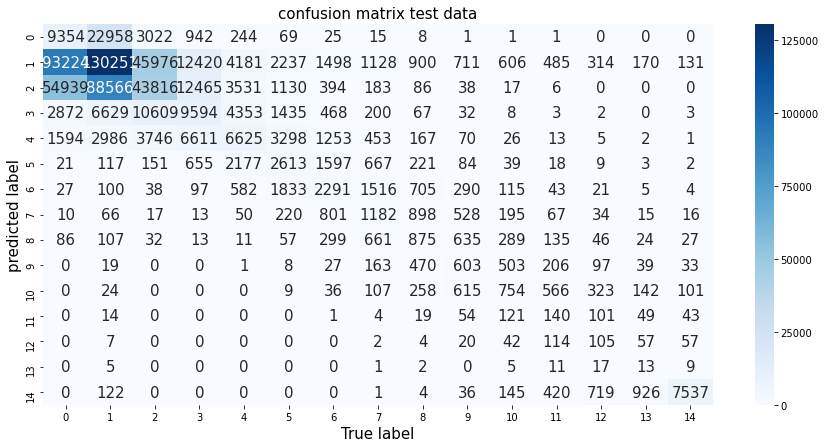

In [200]:
plt.figure(figsize=(15,7))
cm=confusion_matrix(prediction_bagging_rf, y2019)
plt.title("confusion matrix test data",fontsize=15)
sns.heatmap(cm, annot=True, fmt='d',annot_kws={'size':15},square=False,cmap='Blues',cbar=True)
plt.xlabel('True label',fontsize=15)
plt.ylabel('predicted label',fontsize=15)
plt.show()

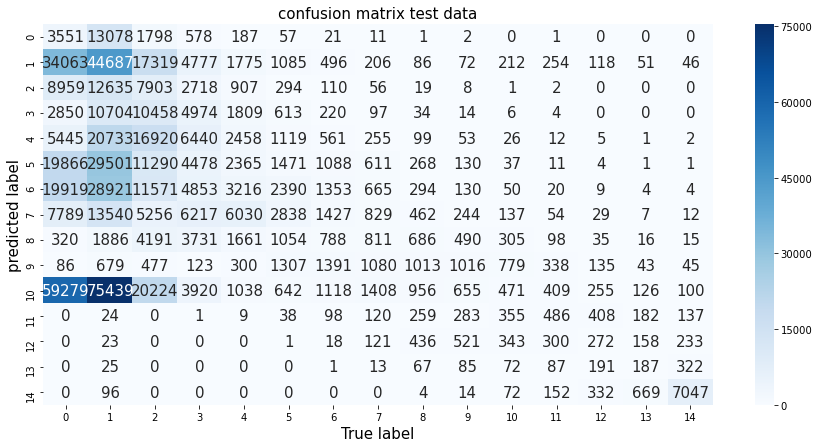

In [201]:
plt.figure(figsize=(15,7))
cm=confusion_matrix(prediction_best_tree, y2019)
plt.title("confusion matrix test data",fontsize=15)
sns.heatmap(cm, annot=True, fmt='d',annot_kws={'size':15},square=False,cmap='Blues',cbar=True)
plt.xlabel('True label',fontsize=15)
plt.ylabel('predicted label',fontsize=15)
plt.show()

- performance of random forest using bagging is more better in recall ,accuracy,precision and confusion matrix 